In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

### Visualizng the Image Data

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
single_image = x_train[1]

In [44]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [45]:
single_image.shape

(28, 28)

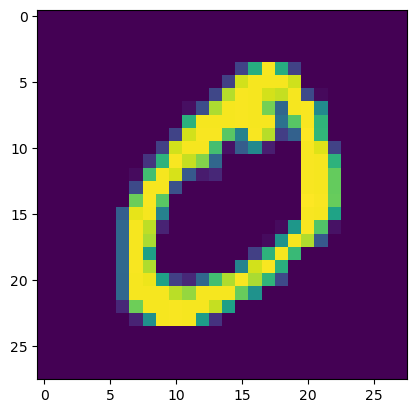

In [46]:
plt.imshow(single_image)

### PreProcessing Data

In [47]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [48]:
y_train.shape

(60000,)

In [49]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [50]:
y_test.shape

(10000,)

In [51]:
from keras.utils import to_categorical

In [52]:
y_example = to_categorical(y_train)

In [53]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [33]:
y_example.shape

(60000, 10)

In [55]:
y_example[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [56]:
y_cat_test = to_categorical(y_test,10)

In [60]:
y_cat_test.shape

(10000, 10)

In [61]:
y_cat_train = to_categorical(y_train,10)

In [63]:
y_cat_train.shape

(60000, 10)

### Processing X Data

We should normalize the X data

In [64]:
single_image.max()

255

In [65]:
single_image.min()

0

In [66]:
x_train = x_train/255
x_test = x_test/255

In [67]:
scaled_single = x_train[1]

In [68]:
scaled_single.max()

1.0

In [69]:
scaled_single.min()

0.0

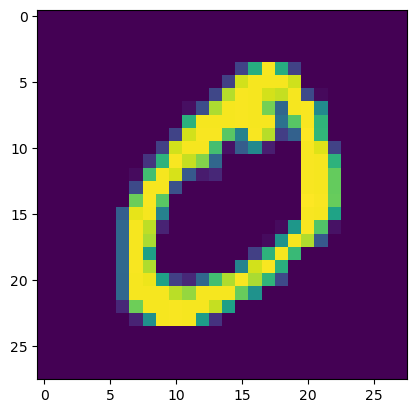

In [70]:
plt.imshow(scaled_single)

### Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [72]:
x_train.shape

(60000, 28, 28)

In [73]:
x_test.shape

(10000, 28, 28)

In [74]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [75]:
x_train.shape

(60000, 28, 28, 1)

In [76]:
x_test.shape

(10000, 28, 28, 1)

## Training the Model

In [78]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [80]:
model = Sequential()

# comvolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2,)))

# flatten images from 28 by 28 to 764 before final layer
model.add(Flatten())

# 128 neurons in dense hidden layer (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128,activation='relu'))

# last layer is the classifier, thus 10 possible classes
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [82]:
from keras.callbacks import EarlyStopping

In [83]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [84]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1380 - accuracy: 0.9585 - val_loss: 0.0610 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.0398 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0363 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0386 - val_accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0389 - val_accuracy: 0.9894


## Evaluate the Model

In [85]:
model.metrics_names

['loss', 'accuracy']

In [86]:
losses = pd.DataFrame(model.history.history)

In [87]:
losses.head

<bound method NDFrame.head of        loss  accuracy  val_loss  val_accuracy
0  0.137988  0.958533  0.061031        0.9815
1  0.045849  0.985950  0.039786        0.9864
2  0.029914  0.990450  0.036259        0.9883
3  0.020065  0.993483  0.038619        0.9875
4  0.014287  0.995617  0.038865        0.9894>

<AxesSubplot:>

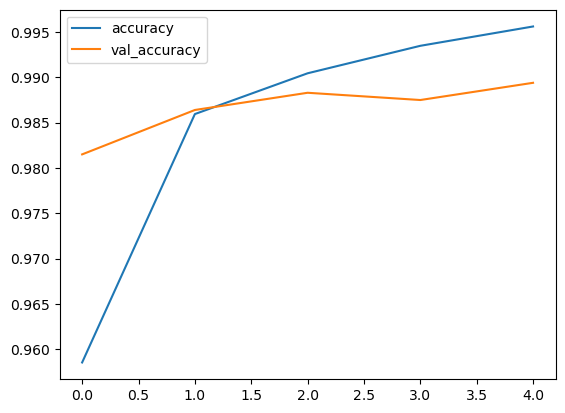

In [88]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

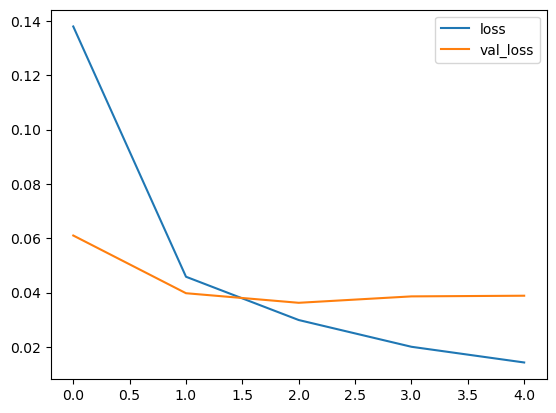

In [89]:
losses[['loss','val_loss']].plot()

In [90]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.0388646237552166, 0.9894000291824341]


In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
preds_prob = model.predict(x_test)
predictions = np.argmax(preds_prob,axis=1)

313/313 [==============================] - 1s 3ms/step


In [95]:
y_cat_test.shape

(10000, 10)

In [99]:
y_cat_test[1]  # =7

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [100]:
predictions[1]

2

In [101]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [102]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [103]:
confusion_matrix(y_test,predictions)

array([[ 976,    1,    1,    1,    0,    0,    1,    0,    0,    0],
       [   0, 1128,    2,    0,    0,    1,    2,    1,    1,    0],
       [   1,    1, 1020,    1,    0,    0,    1,    6,    2,    0],
       [   0,    0,    2, 1006,    0,    1,    0,    0,    1,    0],
       [   0,    0,    0,    0,  969,    0,    5,    0,    0,    8],
       [   1,    1,    0,    7,    0,  880,    2,    0,    0,    1],
       [   4,    1,    0,    0,    1,    2,  949,    0,    1,    0],
       [   0,    1,    5,    0,    0,    0,    0, 1015,    1,    6],
       [   5,    1,    2,    2,    0,    0,    5,    1,  955,    3],
       [   0,    1,    0,    2,    4,    2,    0,    3,    1,  996]],
      dtype=int64)

## Predicting a given image

In [114]:
my_number = x_test[1]

In [115]:
my_number.shape

(28, 28, 1)

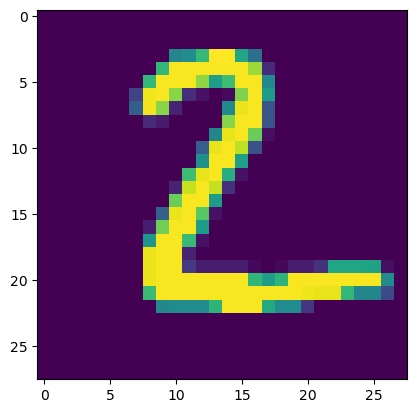

In [116]:
plt.imshow(my_number.reshape(28,28))

In [117]:
# Shape -> (num_images,width,height,color_channels)
preds_prob = model.predict(my_number.reshape(1,28,28,1))
predictions = np.argmax(preds_prob,axis=1)


1/1 [==============================] - 0s 31ms/step


In [118]:
predictions

array([2], dtype=int64)